In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user, password, host
import wrangle_zillow

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [66]:
zillow_df = wrangle_zillow.wrangle_zillow_data()

In [67]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County


In [68]:
zillow_df = zillow_df[zillow_df.loc[:]!=0].dropna()

In [69]:
zillow_df

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County
6,4.0,2.0,1721.0,6861.51,629951.0,Single Family Residential,261.0,Los Angeles County
7,3.0,1.0,1136.0,5488.23,305481.0,Single Family Residential,261.0,Los Angeles County
8,2.0,1.0,1088.0,1498.86,79930.0,Single Family Residential,261.0,Los Angeles County
9,2.0,1.0,914.0,3473.87,260000.0,Single Family Residential,261.0,Los Angeles County
10,3.0,2.0,1263.0,1048.54,66220.0,Single Family Residential,261.0,Los Angeles County


In [70]:
df = zillow_df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']]
X = zillow_df[['bedrooms', 'bathrooms', 'square_feet']]
y = zillow_df[['house_value']]
df.head()

,bedrooms,bathrooms,square_feet,house_value
0,4.0,2.0,1604.0,498347.0
1,3.0,3.0,2384.0,549917.0
2,3.0,2.0,1574.0,235272.0
3,2.0,2.0,1619.0,340000.0
4,2.0,3.0,2408.0,2017254.0


In [71]:
# df['square_feet_divided_by_bedrooms']
df['sqft_per_bedrooms'] = df['square_feet']/df['bedrooms']
df['sqft_per_bathrooms'] = df['square_feet']/df['bathrooms']

In [72]:
df.head()

,bedrooms,bathrooms,square_feet,house_value,sqft_per_bedrooms,sqft_per_bathrooms
0,4.0,2.0,1604.0,498347.0,401.000000,802.000000
1,3.0,3.0,2384.0,549917.0,794.666667,794.666667
2,3.0,2.0,1574.0,235272.0,524.666667,787.000000
3,2.0,2.0,1619.0,340000.0,809.500000,809.500000
4,2.0,3.0,2408.0,2017254.0,1204.000000,802.666667


In [73]:
df = df[['sqft_per_bedrooms', 'sqft_per_bathrooms', 'square_feet', 'house_value']]
df.head()

,sqft_per_bedrooms,sqft_per_bathrooms,square_feet,house_value
0,401.000000,802.000000,1604.0,498347.0
1,794.666667,794.666667,2384.0,549917.0
2,524.666667,787.000000,1574.0,235272.0
3,809.500000,809.500000,1619.0,340000.0
4,1204.000000,802.666667,2408.0,2017254.0


In [74]:
import split_scale

In [75]:
train, test = split_scale.split_my_data(df)

In [76]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler(train, test)

In [78]:
X_train_scaled = train_scaled[['sqft_per_bedrooms', 'sqft_per_bathrooms', 'square_feet']]
y_train = train[['house_value']]

In [79]:
X_test = test.drop(columns='house_value')
y_test = test[['house_value']]

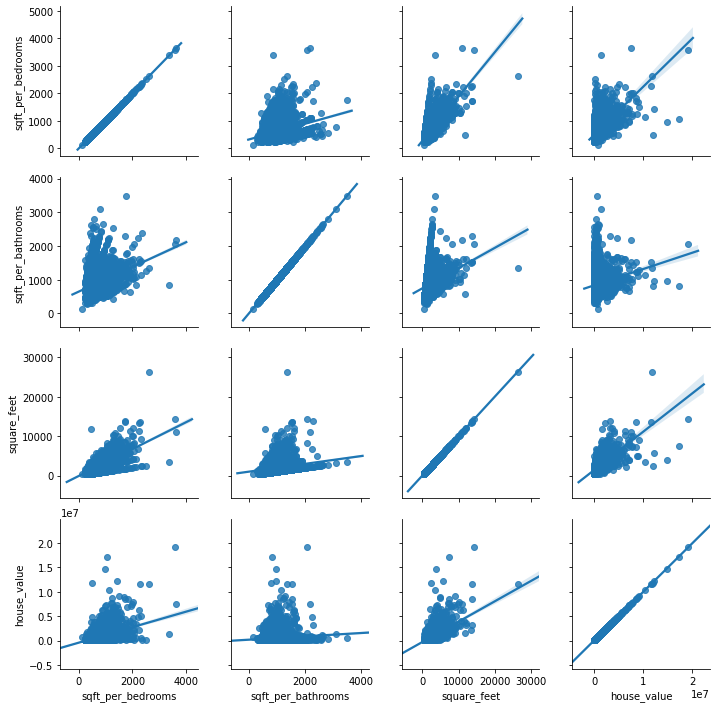

In [81]:
g=sns.PairGrid(df[['sqft_per_bedrooms', 'sqft_per_bathrooms', 'square_feet', 'house_value']])
g.map(sns.regplot)
plt.show()

(0, 4)

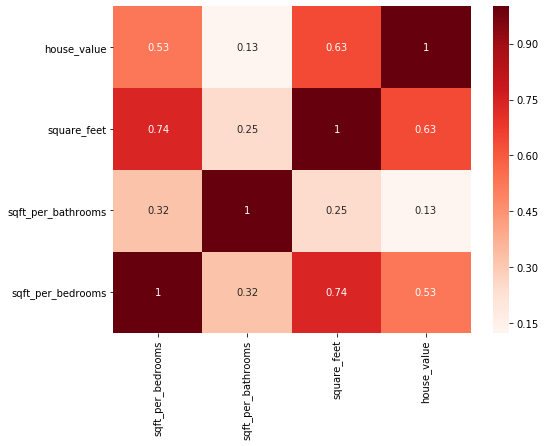

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(train_scaled.corr(), cmap='Reds', annot=True)
plt.ylim(0, 4)

In [83]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train_scaled)

res = sm.OLS(y_train, X_train_scaled).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            house_value   R-squared (uncentered):                   0.276
Model:                            OLS   Adj. R-squared (uncentered):              0.275
Method:                 Least Squares   F-statistic:                              1619.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                        0.00
Time:                        16:38:58   Log-Likelihood:                     -1.8967e+05
No. Observations:               12764   AIC:                                  3.793e+05
Df Residuals:                   12761   BIC:                                  3.794e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_per_bedrooms   9.645e+04   9231.458     10.448      0.000    7.84e+04    1.15e+05
sqft_per_bathrooms -3.664e+04   6428.987     -5.699      0.000   -4.92e+04    -2.4e+04
square_feet         3.565e+05   9016.905     39.539      0.000    3.39e+05    3.74e+05
==============================================================================
Omnibus:                    19185.150   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18196947.408
Skew:                           8.991   Prob(JB):                         0.00
Kurtosis:                     187.098   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lm1 = LinearRegression()

In [86]:
predictions=pd.DataFrame({'actual':y_train.house_value}).reset_index(drop=True)

lm1=LinearRegression()
lm1.fit(X_train_scaled[['sqft_per_bedrooms', 'sqft_per_bathrooms', 'square_feet']],y_train)
lm1_predictions=lm1.predict(X_train_scaled[['sqft_per_bedrooms', 'sqft_per_bathrooms', 'square_feet']])
predictions['lm1']=lm1_predictions

In [87]:
#baseline model
predictions['baseline'] = y_train.mean()[0]
predictions.head()

,actual,lm1,baseline
0,475946.0,616069.332252,466158.614463
1,250799.0,250111.669111,466158.614463
2,199479.0,124024.128043,466158.614463
3,1252995.0,903054.929701,466158.614463
4,107124.0,447492.308690,466158.614463


In [88]:
lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

intercept:  [466158.61446255]
coefficients:  [[ 96450.12680182 -36637.55629058 356523.14304978]]


In [89]:
y_pred_lm1 = lm1.predict(X_train_scaled)
y_pred_lm1

array([[616069.33225207],
       [250111.6691114 ],
       [124024.12804348],
       ...,
       [234891.72325612],
       [452918.76231623],
       [369926.98942792]])

In [90]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1))

linear model
  mean squared error: 2.55e+11


In [93]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_lm1)
r2

0.41332662790689456

In [99]:
from math import sqrt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)

In [101]:
y_train = y_train.house_value

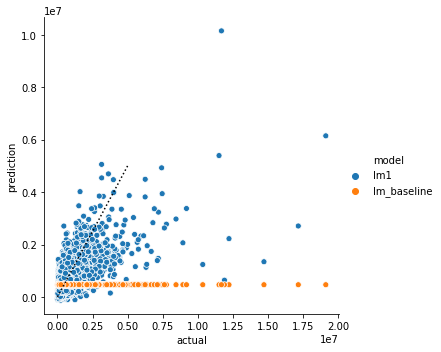

In [102]:
pd.DataFrame({'actual': y_train,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_pred_baseline.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')
min = 0
max = 5_000_000
plt.plot([min, max],[min, max], c='black', ls=':')
# plt.ylim(min, max)
# plt.xlim(min, max)
# plt.title('Predicted vs Actual Final Grade')